# Inaugural project

In [1]:
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Functions

Define **the basic functions**:

In [2]:
def implied_tax(l,w,tau0,tau1,kappa):
    """ calculate implied tax of labor supply choice
    
    Args:
    
        l (float): labor supply
        w (float): wage
        tau0 (float): standard labor tax
        tau1 (float): top bracket labor income tax
        kappa (float): cut-off for the top labor income bracket
        
    Returns:
    
        (float): total tax bill
    
    """
    
    return tau0*w*l + tau1*np.fmax(w*l-kappa,0)

def implied_c(l,m,w,tau0,tau1,kappa):
    """ calculate implied optimal consumption of labor supply choice
    
    Args:
    
        l (float): labor supply
        m (float): cash-on-hand
        w (float): wage
        tau0 (float): standard labor tax
        tau1 (float): top bracket labor income tax
        kappa (float): cut-off for the top labor income bracket
        
    Returns:
    
        (float): consumption
    
    """
    
    return m + w*l - implied_tax(l,w,tau0,tau1,kappa)

def utility(c,l,nu,frisch):
    """ utility of consumption and labor supply decision
    
    Args:
    
        c (float): consumption
        l (float): labor supply
        nu (float): disutility of labor supply
        frisch (float): frisch elasticity of labor supply
        
    Returns:
    
        (float): utility
    
    """
    
    return np.log(c) - nu*l**(1+1/frisch)/(1+1/frisch)

Define the **value-of-choice function**:

In [3]:
def value_of_choice(l,nu,frisch,m,w,tau0,tau1,kappa):
    """ calculate implied utlity of consumption and labor supply choice
    
    Args:
    
        l (float): labor supply
        nu (float): disutility of labor supply
        frisch (float): frisch elasticity of labor supply        
        m (float): cash-on-hand
        w (float): wage
        tau0 (float): standard labor tax
        tau1 (float): top bracket labor income tax
        kappa (float): cut-off for the top labor income bracket
        
    Returns:
    
        (float): utility
        
    """
    
    c = implied_c(l,m,w,tau0,tau1,kappa)
    return utility(c,l,nu,frisch)

Define **optimal solution function:**

In [4]:
def find_optimal_labor_supply(nu,frisch,m,w,tau0,tau1,kappa):
    """ find optimal labor supply choice
    
    Args:
    
        nu (float): disutility of labor supply
        frisch (float): frisch elasticity of labor supply        
        m (float): cash-on-hand
        w (float): wage
        tau0 (float): standard labor tax
        tau1 (float): top bracket labor income tax
        kappa (float): cut-off for the top labor income bracket
        
    Returns:
    
        (float): utility
        
    """
    
    
    obj = lambda l: -value_of_choice(l,nu,frisch,m,w,tau0,tau1,kappa)
    res = optimize.minimize_scalar(obj,bounds=(1e-8,1),method='bounded')
    return res.x

# Question 1+2

Define all **parameters**:

In [5]:
m = 1
nu = 10
frisch = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4

**Allocate** arrays for solutions:

In [6]:
K = 10_000
w_vec = np.linspace(0.5,1.5,K)
l_vec = np.zeros(K)
c_vec = np.zeros(K)

**Solve:**

In [7]:
for i in range(K):
    l_vec[i] = find_optimal_labor_supply(nu,frisch,m,w_vec[i],tau0,tau1,kappa)
    c_vec[i] = implied_c(l_vec[i],m,w_vec[i],tau0,tau1,kappa)

**Plot results:**

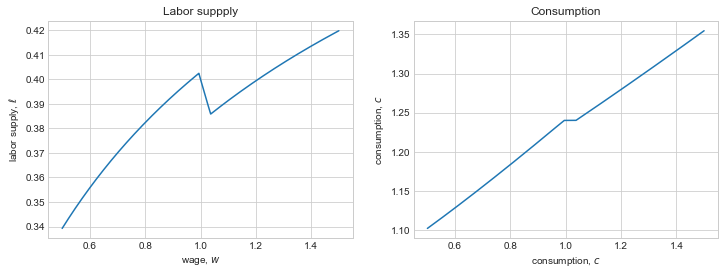

In [8]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1)
ax.plot(w_vec,l_vec,'-')
ax.set_ylabel('labor supply, $\ell$')
ax.set_xlabel('wage, $w$')
ax.set_title('Labor suppply')

ax = fig.add_subplot(1,2,2)
ax.plot(w_vec,c_vec,'-')
ax.set_ylabel('consumption, $c$')
ax.set_xlabel('consumption, $c$')
ax.set_title('Consumption');

# Question 3

Calculate **tax revnue** using that a equally spaced vector approximates a uniform distribution: 

In [9]:
T = np.sum(implied_tax(l_vec,w_vec,tau0,tau1,kappa))
print(f'total tax revenue is: {T:.4f}')

total tax revenue is: 1630.1869


Using **random sampling** is also a possibility:

In [10]:
# a. set seed
np.random.seed(1917)

# b. run replications
reps = 50
T_vec = np.zeros(reps)
for rep in range(reps):
    
    # i. draw randow wages
    w_vec_ = np.random.uniform(0.5,1.5,size=K)
    
    # ii. find labor supply
    l_vec_ = np.zeros(K)
    for i in range(K):
        l_vec_[i] = find_optimal_labor_supply(nu,frisch,m,w_vec_[i],tau0,tau1,kappa)

    # iii. find tax revenue
    T_vec[rep] = np.sum(implied_tax(l_vec_,w_vec_,tau0,tau1,kappa))
    
    if rep < 10 or rep%10 == 0:
        print(f'{rep:2d}: {T_vec[rep]:.4f}')

# c. mean
print(f'mean: {np.mean(T_vec):.4f} [{np.min(T_vec):.4f} {np.max(T_vec):.4f}]')

 0: 1628.8947
 1: 1625.2816
 2: 1630.2167
 3: 1630.4352
 4: 1627.1104
 5: 1628.4940
 6: 1624.8947
 7: 1636.2236
 8: 1628.5268
 9: 1632.8915
10: 1626.8658
20: 1631.2981
30: 1621.4283
40: 1626.9675
mean: 1629.1761 [1617.3815 1637.7069]


# Question 4

**Re-solve** with $\epsilon = 0.1$:

In [11]:
frisch_low = 0.1
l_vec_frisch_low = np.zeros(K)
for i in range(K):
    l_vec_frisch_low[i] = find_optimal_labor_supply(nu,frisch_low,m,w_vec[i],tau0,tau1,kappa)

Re-calculate **tax revenue**:

In [12]:
T_frisch_low = np.sum(implied_tax(l_vec_frisch_low,w_vec,tau0,tau1,kappa))
print(f'total tax revenue is: {T_frisch_low:.4f}')

total tax revenue is: 3196.8810


# Question 5

Define function to calculate **tax revenue for guess of tax parameters**:

In [13]:
def tax_revenue(nu,frisch,m,w_vec,tau0,tau1,kappa):
    """ find total tax revenue 
    
    Args:
    
        nu (float): disutility of labor supply
        frisch (float): frisch elasticity of labor supply        
        m (float): cash-on-hand
        w (np.array): wage
        tau0 (float): standard labor tax
        tau1 (float): top bracket labor income tax
        kappa (float): cut-off for the top labor income bracket
        
    Returns:
    
        (float): total tax revenue
        
    """
    
    # a. optimal labor supply
    l_vec = np.zeros(K)
    for i in range(K):
        l_vec[i] = find_optimal_labor_supply(nu,frisch,m,w_vec[i],tau0,tau1,kappa)
        
    # b. taxes
    T = np.sum(implied_tax(l_vec,w_vec,tau0,tau1,kappa))    
    
    return T

Define **objective function for optimizer**:

In [14]:
def obj(x,nu,frisch_low,m,w_vec,tau0,tau1,kappa):
    """ find negative of total tax revenue 
    
    Args:
        
        x (np.array): tax parameters
        nu (float): disutility of labor supply
        frisch (float): frisch elasticity of labor supply        
        m (float): cash-on-hand
        w_vec (np.array): wage
        
    Returns:
    
        (float): minus total tax revenue
        
    """
    
    global it
    
    tau0 = x[0]
    
    if x.size > 1:
        tau1 = x[1]
        kappa = x[2]
       
    T = tax_revenue(nu,frisch_low,m,w_vec,tau0,tau1,kappa)
    
    if x.size > 1:
        print(f'{it:3d}: tau0 = {x[0]:.8f}, tau1 = {x[1]:.8f}, kappa = {x[2]:.8f} -> T = {T:.8f}')
    else:
        print(f'{it:3d}: tau0 = {x[0]:.8f} -> T = {T:.8f}')
        
    it += 1
    
    return -T

**Solve:**

In [15]:
# a. initial guess and bounds
x0 = np.array([tau0,tau1,kappa])
bounds = ((0,1),(0,1),(0,1.5))

# b. call solver
it = 0
result = optimize.minimize(obj, x0, method='SLSQP',bounds=bounds, args=(nu,frisch,m,w_vec,tau0,tau1,kappa))

  0: tau0 = 0.40000000, tau1 = 0.10000000, kappa = 0.40000000 -> T = 1630.18687347
  1: tau0 = 0.40000001, tau1 = 0.10000000, kappa = 0.40000000 -> T = 1630.18692038
  2: tau0 = 0.40000000, tau1 = 0.10000001, kappa = 0.40000000 -> T = 1630.18686864
  3: tau0 = 0.40000000, tau1 = 0.10000000, kappa = 0.40000001 -> T = 1630.18686667
  4: tau0 = 0.99999727, tau1 = 0.00000028, kappa = 0.00000039 -> T = 105.59773729
  5: tau0 = 0.57395042, tau1 = 0.07100821, kappa = 0.28403264 -> T = 2139.45484669
  6: tau0 = 0.57395044, tau1 = 0.07100821, kappa = 0.28403264 -> T = 2139.45487563
  7: tau0 = 0.57395042, tau1 = 0.07100823, kappa = 0.28403264 -> T = 2139.45483631
  8: tau0 = 0.57395042, tau1 = 0.07100821, kappa = 0.28403265 -> T = 2139.45483654
  9: tau0 = 0.87976265, tau1 = 0.00000351, kappa = 0.00000478 -> T = 2348.76277475
 10: tau0 = 0.87976267, tau1 = 0.00000351, kappa = 0.00000478 -> T = 2348.76273113
 11: tau0 = 0.87976265, tau1 = 0.00000352, kappa = 0.00000478 -> T = 2348.76273113
 12: 

**Show result:**

In [16]:
# a. unpack
tau0_best = result.x[0]
tau1_best = result.x[1]
kappa_best = result.x[2]
T_best = -result.fun

# b. print
print(f'Optimal tau0 is {tau0_best:.4f}, tau1 is {tau1_best:.4f} and kappa is {kappa_best:.4f}')
print(f'We expect the total tax revenue is {T_best:.4f}')

Optimal tau0 is 0.7854, tau1 is 0.0000 and kappa is 0.0000
We expect the total tax revenue is 2466.8603


**Problem:** We are not sure that a global maximum has been found.

**Solution:** Lets try another initial guess.

In [17]:
x0 =  np.array([0.1,0.1,0.1])
it = 0
result = optimize.minimize(obj, x0, method='SLSQP',bounds=bounds, args=(nu,frisch,m,w_vec,tau0,tau1,kappa))

  0: tau0 = 0.10000000, tau1 = 0.10000000, kappa = 0.10000000 -> T = 762.79534721
  1: tau0 = 0.10000001, tau1 = 0.10000000, kappa = 0.10000000 -> T = 762.79540824
  2: tau0 = 0.10000000, tau1 = 0.10000001, kappa = 0.10000000 -> T = 762.79539308
  3: tau0 = 0.10000000, tau1 = 0.10000000, kappa = 0.10000001 -> T = 762.79533205
  4: tau0 = 0.99996387, tau1 = 0.99997286, kappa = 0.00000897 -> T = 0.07379594
  5: tau0 = 0.50310116, tau1 = 0.50310519, kappa = 0.05521320 -> T = 277.80041385
  6: tau0 = 0.27298905, tau1 = 0.27299077, kappa = 0.08077995 -> T = 1849.90127151
  7: tau0 = 0.27298906, tau1 = 0.27299077, kappa = 0.08077995 -> T = 1849.90131161
  8: tau0 = 0.27298905, tau1 = 0.27299079, kappa = 0.08077995 -> T = 1849.90129898
  9: tau0 = 0.27298905, tau1 = 0.27299077, kappa = 0.08077996 -> T = 1849.90122884
 10: tau0 = 1.00000000, tau1 = 0.07582131, kappa = 0.00000000 -> T = 0.05585514
 11: tau0 = 0.45346233, tau1 = 0.22404540, kappa = 0.06072712 -> T = 2227.16649430
 12: tau0 = 0.4

**The result is effectively the samme.** More clear if we force $\tau_1 = \kappa = 0$:

In [18]:
x0 = np.array([0.1])
bounds = ((0,1),)
it = 0
result = optimize.minimize(obj, x0, method='SLSQP',bounds=bounds, args=(nu,frisch,m,w_vec,tau0,tau1,0))

  0: tau0 = 0.10000000 -> T = 864.53152086
  1: tau0 = 0.10000001 -> T = 864.53158202
  2: tau0 = 1.00000000 -> T = 0.06054603
  3: tau0 = 0.46466727 -> T = 2130.83099876
  4: tau0 = 0.46466729 -> T = 2130.83103729
  5: tau0 = 1.00000000 -> T = 0.06054603
  6: tau0 = 0.57007452 -> T = 2359.25978275
  7: tau0 = 0.57007454 -> T = 2359.25980785
  8: tau0 = 0.76709138 -> T = 2382.15780338
  9: tau0 = 0.67588351 -> T = 2465.95328279
 10: tau0 = 0.67588352 -> T = 2465.95328559
 11: tau0 = 0.68916413 -> T = 2466.71866688
 12: tau0 = 0.68916415 -> T = 2466.71866574
 13: tau0 = 0.68531711 -> T = 2466.86018561
 14: tau0 = 0.68531713 -> T = 2466.86018565
 15: tau0 = 0.68543657 -> T = 2466.86034695
 16: tau0 = 0.68543658 -> T = 2466.86034695
